In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://media.geeksforgeeks.org/wp-content/uploads/20240319120216/housing.csv"
data = pd.read_csv(url)
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

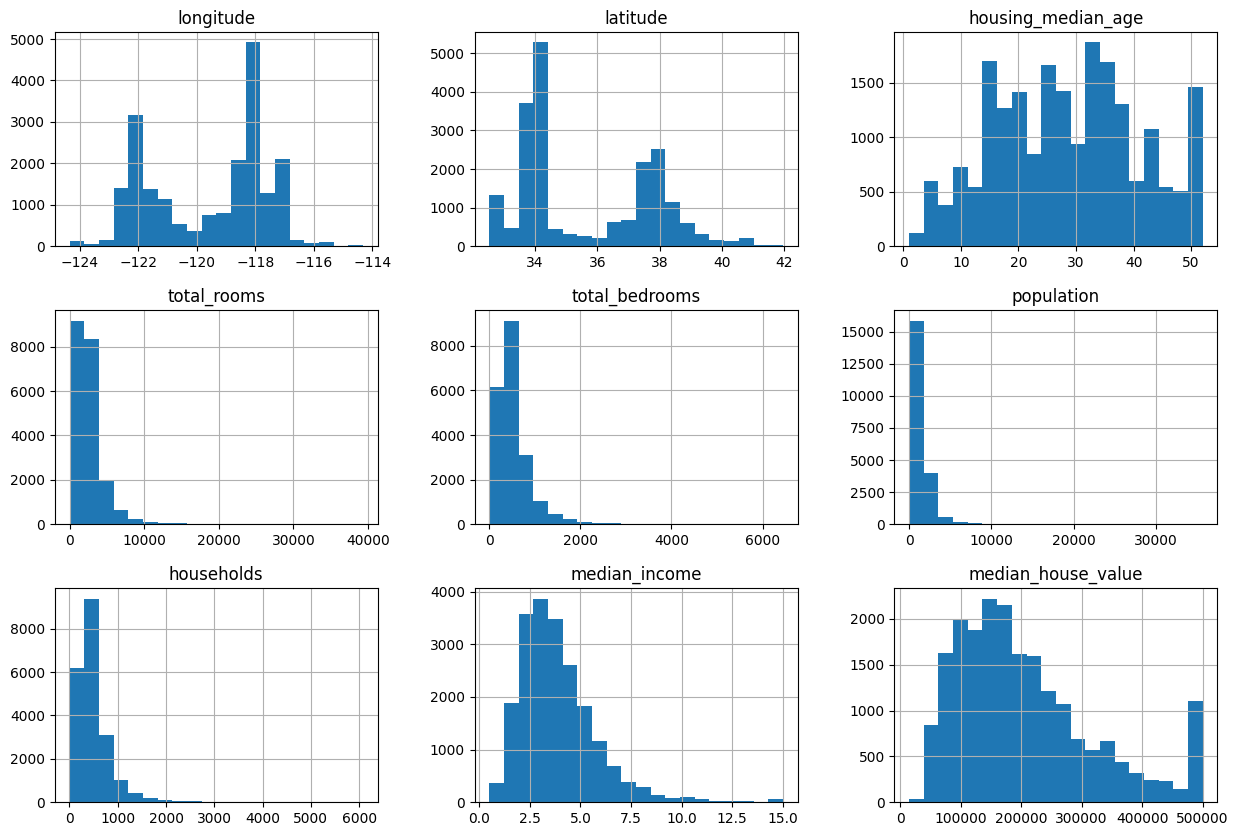

In [7]:
import matplotlib.pyplot as plt

# Plot histograms for each feature
data.hist(bins=20, figsize=(15, 10))
plt.show()



In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

print("Train size:", len(train_set))
print("Test size:", len(test_set))


Train size: 16512
Test size: 4128


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

data["income_cat"] = pd.cut(data["median_income"],
                            bins=[0.,1.5,3.0,4.5,6.,np.inf],
                            labels=[1,2,3,4,5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

print("Stratified Train size:", len(strat_train_set))
print("Stratified Test size:", len(strat_test_set))


Stratified Train size: 16512
Stratified Test size: 4128


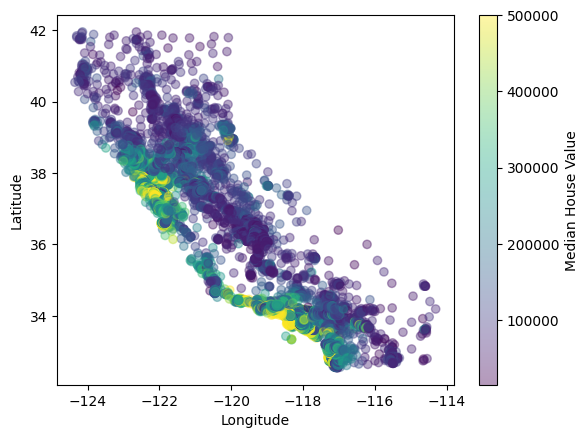

In [11]:
plt.figure()
plt.scatter(data["longitude"], data["latitude"],
            c=data["median_house_value"], alpha=0.4)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Median House Value")
plt.show()


In [12]:
corr_matrix = data.corr(numeric_only=True)

corr_with_price = corr_matrix["median_house_value"].sort_values(ascending=False)

print(corr_with_price)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


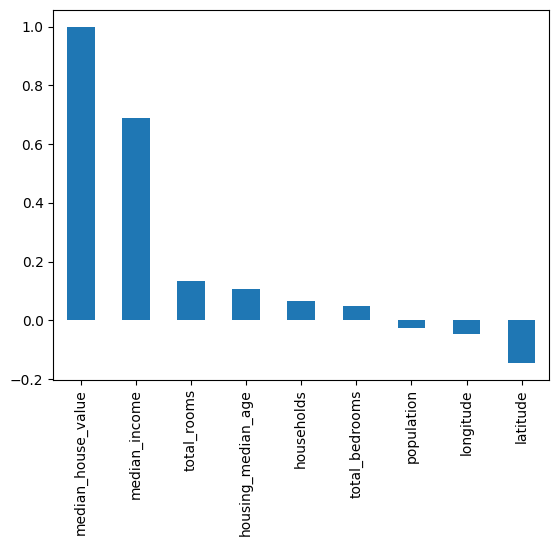

In [13]:
corr_with_price.plot(kind="bar")
plt.show()


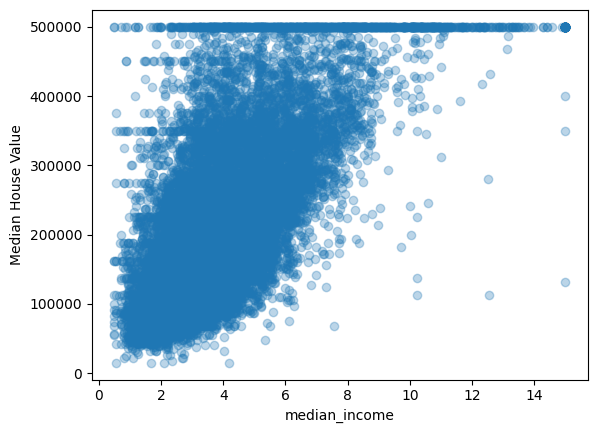

In [14]:
top_feature = corr_with_price.index[1]

plt.scatter(data[top_feature], data["median_house_value"], alpha=0.3)
plt.xlabel(top_feature)
plt.ylabel("Median House Value")
plt.show()


In [15]:
data["rooms_per_household"] = data["total_rooms"] / data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"] / data["total_rooms"]
data["population_per_household"] = data["population"] / data["households"]

new_corr = data.corr(numeric_only=True)["median_house_value"].sort_values(ascending=False)

print(new_corr)


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


In [16]:
from sklearn.impute import SimpleImputer

print(data.isnull().sum())

imputer = SimpleImputer(strategy="median")

data_num = data.drop("ocean_proximity", axis=1)

data_num_imputed = imputer.fit_transform(data_num)

print("Missing values handled successfully")


longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
income_cat                    0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64
Missing values handled successfully


In [17]:
from sklearn.preprocessing import OneHotEncoder

data_cat = data[["ocean_proximity"]]

encoder = OneHotEncoder()

data_cat_encoded = encoder.fit_transform(data_cat)

print("Encoded Shape:", data_cat_encoded.shape)
print("Categories:", encoder.categories_)


Encoded Shape: (20640, 5)
Categories: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_num_imputed)

print("Scaled Data Sample:")
print(data_scaled[:5])


Scaled Data Sample:
[[-1.32783522  1.05254828  0.98214266 -0.8048191  -0.97247648 -0.9744286
  -0.97703285  2.34476576  2.12963148  1.89012782  0.62855945 -1.14993031
  -0.04959654]
 [-1.32284391  1.04318455 -0.60701891  2.0458901   1.35714343  0.86143887
   1.66996103  2.33223796  1.31415614  1.89012782  0.32704136 -0.99038135
  -0.09251223]
 [-1.33282653  1.03850269  1.85618152 -0.53574589 -0.82702426 -0.82077735
  -0.84363692  1.7826994   1.25869341  1.89012782  1.15562047 -1.44586501
  -0.02584253]
 [-1.33781784  1.03850269  1.85618152 -0.62421459 -0.71972345 -0.76602806
  -0.73378144  0.93296751  1.16510007  0.94189394  0.15696608 -0.49362714
  -0.0503293 ]
 [-1.33781784  1.03850269  1.85618152 -0.46240395 -0.61242263 -0.75984669
  -0.62915718 -0.012881    1.17289952 -0.00633994  0.3447108  -0.707889
  -0.08561576]]


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]

        return np.c_[X, rooms_per_household, population_per_household]

num_attribs = list(data.drop("ocean_proximity", axis=1))
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("scaler", StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

data_prepared = full_pipeline.fit_transform(data)

print("Final Prepared Data Shape:", data_prepared.shape)


Final Prepared Data Shape: (20640, 20)
